In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
data_AB=np.genfromtxt('A-B_Bond_energy.dat')

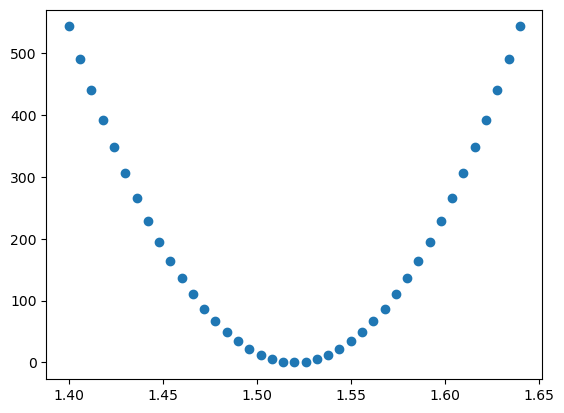

In [57]:
plt.plot(data_AB[:,0],data_AB[:,1], 'o')

In [58]:
a,b,c=np.polyfit(data_AB[:,0], data_AB[:,1],2)

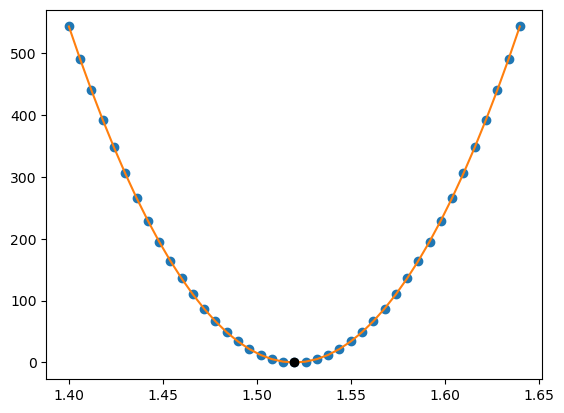

In [59]:
plt.plot(data_AB[:,0],data_AB[:,1], 'o')
plt.plot(data_AB[:,0], a*data_AB[:,0]**2+b*data_AB[:,0]+c)
mask=np.where(data_AB[:,1]==data_AB[:,1].min())
b0=data_AB[:,0][mask]
plt.plot(data_AB[:,0][mask],data_AB[:,0][mask], 'o', c='k')


In [60]:
#check
k_B=a
print(-2*k_B*b0,b)
print(k_B*b0**2,c)

[-114760.00000001] -114760.00000000912
[87217.60000001] 87217.60000000702


In [61]:
print(f'harmonic for A-B bond:{k_B}, equilibrium distance:{b0[0]} angstrom')

harmonic for A-B bond:37750.000000002954, equilibrium distance:1.52 angstrom


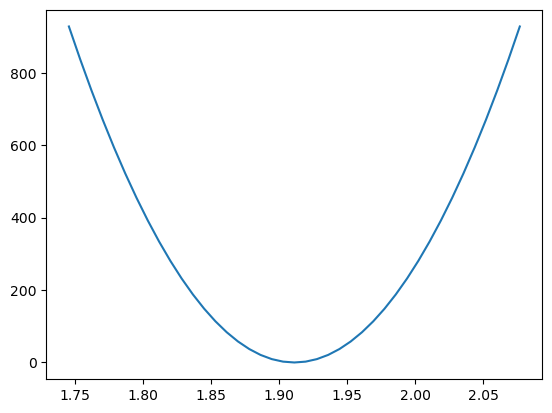

In [62]:
data_ABA=np.genfromtxt('A-B-A_Bend_energy.dat')
plt.plot(data_ABA[:,0], data_ABA[:,1])

In [63]:
a_bend,b_bend,c_bend=np.polyfit(data_ABA[:,0], data_ABA[:,1],2)
massk_bend=np.where(data_ABA[:,1]==data_ABA[:,1].min())
b0_bend=data_ABA[:,0][massk_bend]

In [64]:
#check
print(-2*a_bend*b0_bend,b_bend)
print(a_bend*b0_bend**2,c_bend)

[-129001.82257125] -129001.83120280392
[123269.94908985] 123269.9652597155


In [65]:
print(f'For A-B-A angle k_theta={a_bend},a_0={b0_bend[0]*57.296} degrees')

For A-B-A angle k_theta=33750.0549598146,a_0=109.50039096 degrees


In [66]:
data_ABC=np.genfromtxt('A-B-C_Bend_energy.dat')

In [67]:
a_bendC,b_bendC,c_bendC=np.polyfit(data_ABC[:,0], data_ABC[:,1],2)
mask_bendC=np.where(data_ABC[:,1]==data_ABC[:,1].min())
b0_bendC=data_ABC[:,0][mask_bendC]

In [68]:
#check
print(-2*a_bendC*b0_bendC,b_bendC)
print(a_bendC*b0_bendC**2,c_bendC)

[-96321.26828947] -96321.2747343554
[92041.4735362] 92041.48579261296


In [69]:
print(f'for A_B_C angle k_theta={a_bendC},b_0={b0_bendC*57.296}')

for A_B_C angle k_theta=25200.016819710265,b_0=[109.50039096]


Q33

In [70]:
temp=np.array([300,325,350,375,400])
av_internal_energy=np.array([12.8283580023,13.8807947923,14.9227471375,15.9619748905,17.0397987068]) #kj/mol
p_m=np.array([0.1462571208, 0.1243111030,0.0449293382,0.0960544210,0.0833151189])

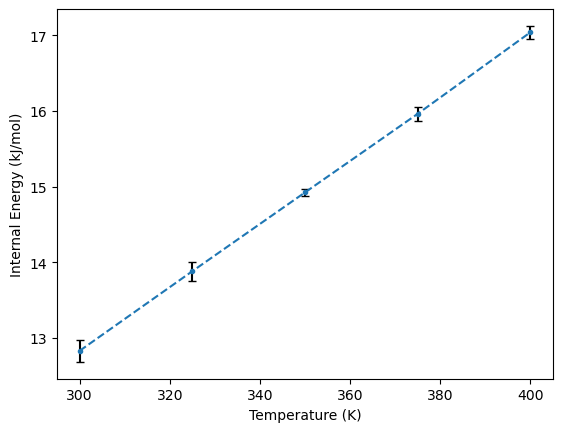

In [71]:
plt.errorbar(temp,av_internal_energy,yerr=p_m, capsize=3, fmt="--.", ecolor = "black")
plt.xlabel('Temperature (K)')
plt.ylabel('Internal Energy (kJ/mol)')
plt.savefig('Q33_internal_energy',dpi=300)
plt.show()

In [72]:
TUe_red='#a80707'

In [73]:
def plt_potentials(file, sim_type,temp, show_plot):
    data=np.genfromtxt(file)

    conf_number=data[:,0]
    curr_PE=data[:,1]*1.38e-23*6.022e23/1e3 #convert to KJ/mol
    cum_av_PE=data[:,2]*1.38e-23*6.022e23/1e3 #convert to KJ/mol

    if show_plot:
        plt.plot(conf_number*20,curr_PE,'--' ,label=f'Current', alpha=0.8)
        plt.plot(conf_number*20,cum_av_PE, label=f'Average', c=TUe_red)
        plt.legend()
        plt.title(f'{sim_type} in NVT ensemble at {temp}K')
        plt.ylabel('PE (KJ/mol)')
        plt.xlabel('MC cycle')
        plt.xlim(-200,50000)
        plt.savefig('Q33_simulation_jdoe_50',dpi=300)
        plt.show()
    return conf_number,curr_PE, cum_av_PE

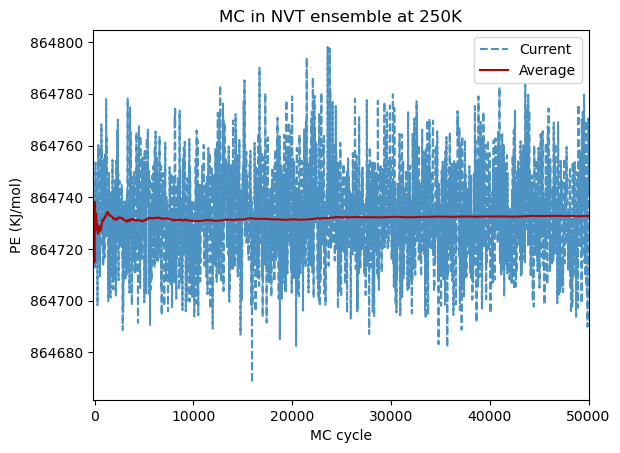

In [74]:
_,_,_=plt_potentials('U_energy.dat','MC',250,True)